In [3]:
# Install these if not already available
# !pip install pandas scikit-learn xgboost matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ModuleNotFoundError: No module named 'pandas'

In [5]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Yash Ladda\\Desktop\\DWDA Notes\\exams cutoff\\jee cutoff.csv")

# Quick look
print(df.shape)
df.head()

df.isnull().sum()

NameError: name 'pd' is not defined

In [6]:
# Choose relevant columns
cols = [
    'year', 'round_no', 'institute_name', 'branch',
    'quota', 'pool', 'category', 'closing_rank'
]
df = df[cols].dropna()

# Optional: use only final round for each year
df = df[df['round_no'] == df['round_no'].max()]


In [8]:
# Encode categorical variables
categorical_cols = ['institute_name', 'branch', 'quota', 'pool', 'category']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoders for later prediction use


In [10]:
# Train-test split
train_df = df[df['year'] < 2023]
test_df  = df[df['year'] == 2023]

# Features and target
features = ['year', 'round_no', 'institute_name', 'branch', 'quota', 'pool', 'category']
target = 'closing_rank'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]


In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
print(df['year'].unique())

[2017 2018 2019]


In [20]:
latest_year = df['year'].max()
train_df = df[df['year'] < latest_year]
test_df = df[df['year'] == latest_year]

In [26]:
print(X_test.shape)  # Should give (number_of_samples, number_of_features)
print(y_test.shape)  # Should give (number_of_samples,)


(0, 7)
(0,)


In [28]:
X = df[features]
y = df[target]

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Continue with model training and evaluation...


In [30]:
from sklearn.ensemble import RandomForestRegressor

# 1. Instantiate
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Fit on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
# Predict closing ranks for the test set
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE):        {mae:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse:.2f}")
print(f"R² Score (coefficient of determination): {r2:.4f}")


Mean Absolute Error (MAE):        3047.73
Root Mean Squared Error (RMSE):   18216.85
R² Score (coefficient of determination): 0.8268


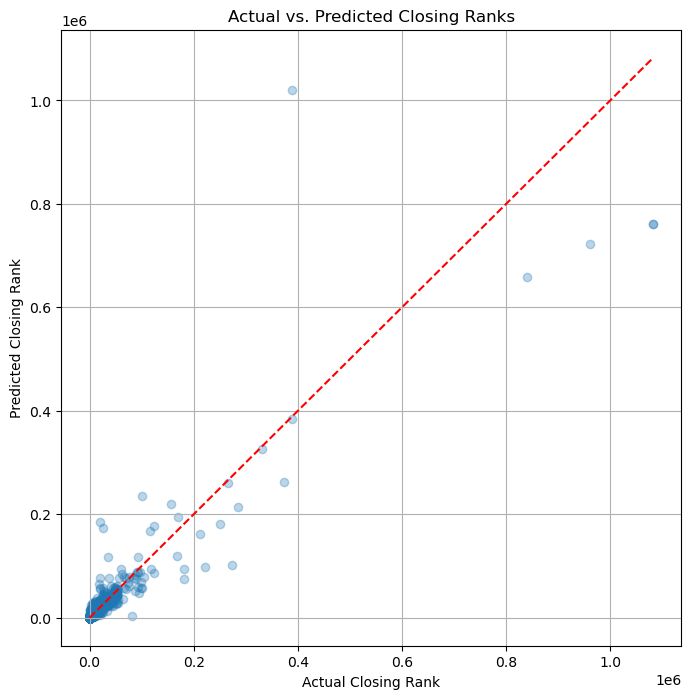

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Closing Rank")
plt.ylabel("Predicted Closing Rank")
plt.title("Actual vs. Predicted Closing Ranks")
plt.grid(True)
plt.show()


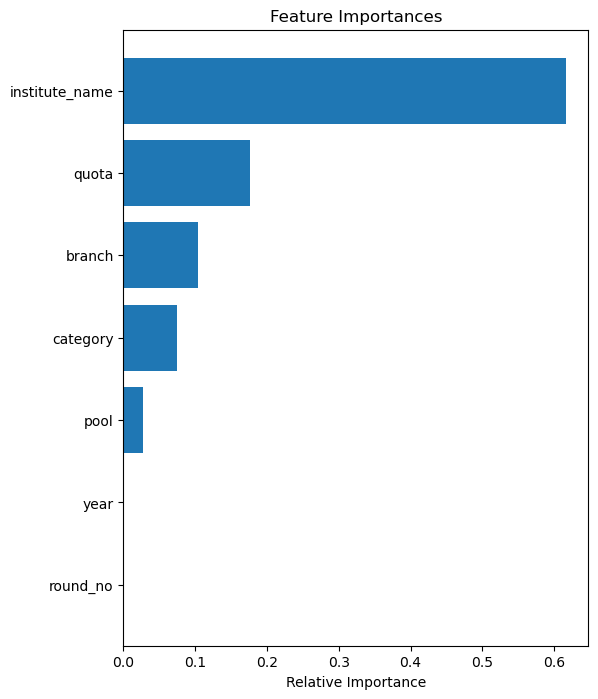

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract importances
importances = model.feature_importances_
feat_names = X_train.columns

# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({
    'feature': feat_names,
    'importance': importances
}).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(6,8))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.show()


In [42]:
from sklearn.metrics import r2_score
accuracy_percent = r2_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy_percent:.2f}%")


Accuracy: 82.68%


In [44]:
from sklearn.model_selection import cross_val_score

# Use negative MAE (so we take the absolute)
scores = cross_val_score(
    model, X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print("5‑fold CV MAE: ",
      np.mean(-scores).round(2),
      "±", np.std(-scores).round(2))


5‑fold CV MAE:  3934.39 ± 252.11


In [46]:
import joblib

# Save to disk
joblib.dump(model, 'closing_rank_regressor.joblib')

# Later you can load it via:
# model = joblib.load('closing_rank_regressor.joblib')


['closing_rank_regressor.joblib']

In [48]:
import numpy as np

# Transform target to log scale
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [50]:
model.fit(X_train, y_train_log)


RandomForestRegressor(random_state=42)

In [52]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  3115.45
RMSE: 20252.07
R²:   0.7859


C:\Users\Yash Ladda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train_log)
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  2985.75
RMSE: 27805.60
R²:   0.5964


C:\Users\Yash Ladda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
df['institute_popularity'] = df['institute_name'].map({
    'IIT': 2, 'NIT': 1
    # You can refine based on actual data
})
# df['is_cse'] = df['branch'].apply(lambda x: 1 if 'CSE' in x.upper() else 0)
df['is_cse'] = df['branch'].apply(lambda x: 1 if 'CSE' in str(x).upper() else 0)
df['category_encoded'] = df['category'].astype('category').cat.codes


In [83]:
print(df.columns)


Index(['year', 'round_no', 'institute_name', 'branch', 'quota', 'pool',
       'category', 'closing_rank', 'institute_popularity', 'is_cse'],
      dtype='object')


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train_log)
best_model = grid_search.best_estimator_

# Predict using best model
y_pred = np.expm1(best_model.predict(X_test))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train_log, scoring='neg_mean_absolute_error', cv=5)
mae_cv = -scores.mean()
std_cv = scores.std()

print(f"5-fold CV MAE: {mae_cv:.2f} ± {std_cv:.2f}")

# Predict using the best model
y_pred = np.expm1(best_model.predict(X_test))

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Final Test Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")



5-fold CV MAE: 0.26 ± 0.01

📊 Final Test Evaluation:
MAE:  2917.33
RMSE: 26580.43
R²:   0.6312


C:\Users\Yash Ladda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
print("Best parameters:", grid_search.best_params_)
print("Best score (neg MAE):", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best score (neg MAE): -0.2723174518730953


In [117]:
import joblib

# Save the best model
joblib.dump(best_model, 'jee_closing_rank_predictor.pkl')

['jee_closing_rank_predictor.pkl']